## Image classification

Implemented a Deep Convolutional Neural Network for image classification, using Keras.

- Worked with fashion MNIST dataset.
- Preprocessed the data.
- Built the CNN model using convolutional layers, adding dropout to avoid overfitting and evaluating its performance with accuracy score, achieving over 90%.

In [1]:
# Kalliopi Tsolaki, AEM 20
# MSc Digital Media & Computational Intelligence
# Deep Learning
# Project 2019

In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import keras 
from keras import backend as k
from keras.models import Sequential
from keras.layers import MaxPool2D, Conv2D, Flatten, Dropout
from keras.layers.core import Dense , Activation 
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

from keras.datasets import fashion_mnist



Using TensorFlow backend.
C:\Users\popak\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\popak\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\popak\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\popak\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Train/test data shape: (60000, 28, 28) (10000, 28, 28)
Train/test labels shape: (60000,) (10000,)


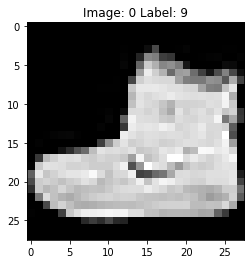

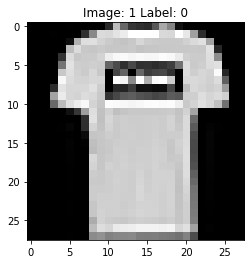

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Train/test data shape:", x_train.shape, x_test.shape)
print("Train/test labels shape:", y_train.shape, y_test.shape)

for i in range(2):
    plt.figure(i)
    plt.imshow(x_train[i], cmap='gray')
    plt.title("Image: " + str(i) + " Label: " + str(y_train[i]))
    


In [4]:
for i in range(2):
    for x in range (x_train.shape[1]):
        for y in range (x_train.shape[2]):
            print(x_train[x,y])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0 13 73  0  0  1  4  0  0  0
  0  1  1  0]
[  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
  54   0   0   0   1   3   4   0   0   3]
[  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
 144 123  23   0   0   0   0  12  10   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
 107 156 161 109  64  23  77 130  72  15]
[  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
 216 163 127 121 122 146 141  88 172  66]
[  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229
 223 223 215 213 164 127 123 196 229   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0 183 225 216 223 228
 235 227 224 222 224 221 223 245 173   0]
[  0   0   0   0   0   0   0   0   0   0   0   0 

[  0   0   0   0   0   0   0 170 255  34 221 229 215 217 217 214 216 238
 102 254 175   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0 172 255  27 235 225 215 214 215 215 213 246
 104 253 181   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0 173 255  18 249 217 215 215 215 216 210 241
  95 247 183   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0 172 255  19 252 214 216 215 214 215 211 245
 106 244 176   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0 164 254  27 253 212 217 216 214 215 214 243
 110 243 145   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0 169 255  42 253 211 215 218 218 215 215 233
 149 255 141   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0 103 131  49 253 212 216 222 219 217 214 249
 128 122  78   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0  58 254 218 217 225 218 219 212 253
 110   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   4   0  64 237 219 220 229 217 222 217 235
 129   

 226 112 133 245 216  83   0   0   0   0]
[  0   0   0   0 102 238 228  79 165 198 182 186 189 192 192 191 191 182
 217 113 131 250 209  95   0   0   0   0]
[  0   0   0   0 113 234 239 103 155 199 182 187 191 192 191 190 191 183
 212 130 128 243 203 103   0   0   0   0]
[  0   0   0   0 114 220 251 106 144 187 180 184 187 188 187 186 185 183
 190 144 103 236 202 110   0   0   0   0]
[  0   0   0   0 114 208 252  71 176 202 195 198 202 202 201 201 201 197
 202 178  81 233 205 116   0   0   0   0]
[  0   0   0   0 109 238 255  38 105 166 156 159 161 162 159 156 156 155
 170 112  44 241 224 136   0   0   0   0]
[  0   0   0   0  33 177 179  16   0   0   0   0   0   0   0   0   0   0
   0   0   0 163 165  53   0   0   0   0]
[ 0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0 51  0  0  0  0  0  0  0
  0  0  0  0]
[  0   0   0   0   0   0   0   0   0 139 214 218 220 164 206 243 233 205
  93   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0 130 253 225 226 233 229 232 230 2

In [11]:
train_data = np.array(x_train)
train_labels = np.array(y_train)
test_data = np.array(x_test) 
test_labels = np.array(y_test)
#test_labels = y_test
#test_data = y_train

In [13]:

#scaler = MinMaxScaler(feature_range=(0,1))
#scaled_train_data = scaler.fit_transform((train_data).reshape(-1,1))
#scaled_train_data = np.array(scaled_train_data).reshape((60000,28,28))
scaled_train_data = train_data.reshape((-1, 28, 28, 1)) / 255.0
scaled_test_data = test_data.reshape((-1, 28, 28, 1)) / 255.0


In [20]:
train_labels = np.array(y_train) # Rewriting these 2 lines of code, as multiple execution of this shell would keep 
#test_labels = np.array(y_test)  adding dimensions on the train_labels and test_labels
train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
# test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

print("Train/test data shape:", scaled_train_data.shape, scaled_test_data.shape)
print("Train/test labels shape:", train_labels.shape, test_labels.shape)
print(train_labels[0], np.argmax(train_labels[0]))
print(train_labels[1], np.argmax(train_labels[1]))
print(train_labels[2], np.argmax(train_labels[2]))
print(train_labels[3], np.argmax(train_labels[3]))
print(train_labels[4], np.argmax(train_labels[4]))
print(train_labels[5], np.argmax(train_labels[5]))

Train/test data shape: (60000, 28, 28, 1) (10000, 28, 28, 1)
Train/test labels shape: (60000, 10) (10000,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 9
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 3
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 2


In [22]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               524544    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [23]:
model.fit(scaled_train_data, train_labels,validation_split = 0.1, epochs=30, batch_size=256, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/30
 - 156s - loss: 0.5879 - accuracy: 0.7895 - val_loss: 0.4006 - val_accuracy: 0.8502
Epoch 2/30
 - 184s - loss: 0.3552 - accuracy: 0.8722 - val_loss: 0.3320 - val_accuracy: 0.8803
Epoch 3/30
 - 192s - loss: 0.2984 - accuracy: 0.8928 - val_loss: 0.2907 - val_accuracy: 0.8950
Epoch 4/30
 - 180s - loss: 0.2682 - accuracy: 0.9037 - val_loss: 0.2913 - val_accuracy: 0.8935
Epoch 5/30


KeyboardInterrupt: 

In [10]:
'''
predictions = model.predict(scaled_test_data, batch_size =10, verbose=0)

for i in predictions:
    print(i)
'''

[1.5677826e-13 1.6300096e-16 1.3131534e-13 2.4768523e-18 2.3645575e-17
 8.8725233e-10 3.3334268e-18 5.2822198e-08 3.0348348e-15 1.0000000e+00]
[7.3780904e-10 1.9239566e-24 1.0000000e+00 1.5532501e-15 5.9006354e-20
 1.4919078e-21 3.7535280e-16 8.9376186e-23 5.7267951e-21 7.9538188e-19]
[2.23516133e-23 1.00000000e+00 1.53882259e-25 5.83681553e-18
 2.25737774e-25 9.00494124e-29 5.00252149e-25 1.06908375e-32
 1.15414508e-23 2.89023284e-29]
[1.2766569e-20 1.0000000e+00 2.7824595e-21 2.7614714e-20 9.2545255e-23
 2.9335561e-27 7.8476590e-22 1.3271938e-28 2.9407941e-27 5.1084356e-31]
[2.2781174e-05 1.2123547e-18 1.1144873e-08 7.4063819e-12 2.7397589e-11
 9.8938286e-17 9.9997723e-01 9.2011541e-17 1.3103936e-17 3.1403790e-17]
[1.3210204e-22 1.0000000e+00 5.4737619e-23 4.3114738e-17 2.9115561e-22
 5.6334463e-23 2.4089778e-25 4.2419016e-29 7.8289147e-21 5.5767123e-26]
[3.6178944e-23 3.3275504e-22 1.5972125e-11 5.0047969e-16 1.0000000e+00
 1.1834590e-23 4.9779711e-15 6.1483030e-25 3.0234782e-21 3.2

[1.82733004e-07 1.88856483e-12 3.33466334e-04 5.49404876e-06
 9.33206260e-01 1.47737893e-07 2.13698077e-05 1.14324045e-14
 6.64330423e-02 1.41450879e-10]
[9.9999821e-01 1.5778415e-13 8.4845908e-09 1.6296792e-06 7.6915159e-14
 6.1420942e-13 1.7706347e-07 5.8622266e-16 2.5313510e-11 3.7182600e-18]
[3.6440127e-18 1.3470379e-24 1.3400788e-15 5.2225478e-21 2.1231967e-21
 1.8397220e-13 4.3279423e-14 1.2682808e-17 2.8545902e-13 1.0000000e+00]
[1.3088526e-10 4.2344668e-14 7.3590986e-12 6.3681491e-12 5.3911292e-13
 2.0824973e-13 1.9362595e-14 9.9989748e-01 6.1344575e-11 1.0248048e-04]
[5.7437263e-14 2.8112503e-13 5.4070753e-10 1.2105407e-10 8.5278404e-13
 9.5220765e-10 1.4510214e-09 5.1386794e-03 1.6027327e-11 9.9486130e-01]
[2.69133018e-08 1.39078027e-10 3.19800369e-04 4.96714756e-06
 9.99669909e-01 5.85312285e-11 5.22039545e-06 1.65374399e-08
 8.79849864e-08 1.35647014e-11]
[2.9272922e-22 6.2590895e-21 8.3811654e-17 4.7543448e-23 1.5976630e-19
 5.2865369e-18 3.0389993e-19 9.3983239e-16 1.0000

 1.6298427e-12 2.4892209e-13 1.0439146e-04 7.2647110e-12 9.9989557e-01]
[4.2164373e-13 1.6943474e-08 1.5091853e-01 1.1990545e-12 8.4215182e-01
 6.2916533e-11 6.9295322e-03 1.8748096e-12 2.4674211e-11 3.9866235e-10]
[2.9649505e-11 7.5940730e-15 9.2590470e-03 3.9709085e-16 9.9074054e-01
 3.8102078e-12 5.3088041e-07 9.2534826e-15 1.0807837e-10 9.5004665e-14]
[3.2226103e-17 1.0613073e-23 9.1247516e-23 2.5768304e-22 1.2681869e-20
 7.1885239e-20 3.9156939e-18 1.0110289e-20 1.0000000e+00 7.0796213e-18]
[2.8772324e-20 1.0000000e+00 7.6099634e-20 4.1729297e-17 3.8747790e-22
 1.3940758e-26 2.2834528e-20 8.2099382e-25 2.4170069e-23 2.4678693e-29]
[5.2241251e-08 2.8740796e-15 2.1120046e-13 9.9999976e-01 2.5642864e-16
 1.2904308e-11 2.5823996e-07 9.7074645e-16 3.6024426e-15 3.2888804e-16]
[5.97759429e-12 1.46754295e-16 2.77125545e-10 4.99155079e-13
 6.11189932e-07 1.46818994e-12 9.99999404e-01 1.35799736e-14
 1.99143328e-13 5.23473300e-13]
[8.5652210e-13 1.0000000e+00 5.6593868e-13 7.5074079e-11 1.

[1.20522255e-12 5.80261032e-16 1.37969565e-08 1.24541549e-11
 6.73408485e-09 1.93719520e-12 1.00000000e+00 3.74679366e-14
 4.41605899e-13 1.27943554e-13]
[1.1276626e-15 2.4574163e-18 4.0659961e-13 5.4105732e-20 1.4826901e-17
 1.2148026e-05 1.8350803e-17 9.9998784e-01 5.9008549e-13 8.8634294e-11]
[9.6034694e-07 1.5117707e-13 2.1089412e-10 9.9997914e-01 1.2025945e-14
 1.0949054e-11 1.9888370e-05 1.3208603e-13 7.8331196e-12 4.3699131e-11]
[2.3921669e-09 1.7848378e-14 4.3657724e-06 9.9995840e-01 3.7237005e-05
 4.0141446e-15 2.9438918e-09 7.5711677e-12 2.7861998e-13 4.5616413e-13]
[1.5757267e-05 7.9577991e-17 9.9998426e-01 5.0186487e-11 4.6173967e-10
 2.7736059e-16 7.0517636e-10 6.4028838e-18 1.8128031e-16 2.0485164e-17]
[1.07056995e-10 2.76548939e-13 2.13383157e-02 4.39725025e-14
 9.78661656e-01 6.93717612e-14 3.32116334e-10 1.40914591e-12
 1.65389549e-10 1.57778179e-10]
[4.3665132e-08 6.8681877e-13 1.2762083e-01 2.8054398e-13 2.6485796e-07
 8.5360787e-13 8.7237883e-01 2.2243178e-15 7.0885

 1.00000000e+00 1.45103883e-12]
[7.3781202e-17 4.3510980e-23 1.0028888e-21 1.3760329e-18 2.4797477e-16
 4.1867018e-19 2.0961235e-22 1.0275367e-15 1.0000000e+00 1.2015383e-20]
[7.0887573e-25 8.6294225e-31 8.4189425e-25 1.2503293e-24 6.0560585e-31
 5.1631647e-27 2.8876298e-23 8.9026386e-23 1.0000000e+00 1.0409068e-23]
[1.2247587e-09 6.3413523e-09 7.8071042e-07 4.3732291e-01 5.6262457e-01
 1.7629748e-11 5.1547016e-05 1.9634939e-08 4.0606196e-08 7.1719228e-08]
[2.3809466e-10 5.4216834e-14 2.0303413e-10 2.6944496e-09 2.1438311e-09
 6.7292499e-13 9.1971032e-07 6.8292982e-11 9.9999905e-01 4.7491446e-09]
[1.16131195e-17 1.00000000e+00 2.36087108e-17 7.29726609e-14
 3.12363497e-20 6.84453271e-23 8.85149827e-17 7.26803490e-23
 2.67681747e-19 2.01859913e-23]
[7.9891353e-16 5.0572953e-20 4.1113563e-16 2.6507087e-22 1.0326080e-18
 2.0396806e-19 1.1082954e-19 1.9825555e-16 1.0000000e+00 1.5526200e-14]
[3.9947734e-15 8.8090934e-16 7.3094688e-14 5.1787176e-16 3.3274700e-17
 3.9349791e-11 4.7093367e-19

 8.7129633e-19 2.2870409e-23 1.8418686e-19 1.8946137e-23 1.0000000e+00]
[9.3899044e-16 3.4341847e-16 1.2934757e-13 3.6131964e-13 6.0822476e-15
 2.4909569e-14 2.1616693e-17 9.9998105e-01 2.6750957e-13 1.8901086e-05]
[2.7358261e-11 1.1023498e-12 5.1035615e-10 1.5128326e-12 5.2024288e-12
 1.2582057e-15 6.1894781e-08 7.9268619e-11 9.9999988e-01 3.4023433e-11]
[6.7523459e-11 2.1068838e-10 2.9863176e-01 3.7828635e-15 6.9792259e-01
 3.1567669e-11 3.4455301e-03 4.9135229e-13 7.4557915e-09 1.4231297e-07]
[9.9832731e-01 1.3000624e-10 3.6495583e-04 3.5767858e-05 7.9171114e-06
 1.5588421e-08 1.1784745e-03 1.8453100e-10 8.5475862e-05 2.6303518e-08]
[5.6691304e-21 2.6827846e-21 8.5204469e-20 3.4131078e-22 2.6460077e-17
 2.5468735e-10 4.7728639e-22 7.0156378e-14 1.0477107e-16 1.0000000e+00]
[1.6286555e-15 3.9259950e-20 9.1868833e-16 1.7581385e-21 1.4363981e-19
 4.0826058e-13 2.4305473e-27 1.0000000e+00 3.9528444e-15 2.2172591e-16]
[6.6337075e-12 1.0996160e-19 7.2053096e-17 1.0349326e-22 7.0450927e-23

[2.6749106e-10 6.7365144e-16 1.0000000e+00 6.1170264e-17 6.8437950e-10
 2.5470200e-17 3.0557312e-09 1.1050743e-19 1.1576756e-18 1.3918133e-17]
[2.2925257e-11 2.8105419e-16 6.3658143e-07 1.4860465e-19 3.7854800e-14
 4.0475018e-10 9.7355532e-08 2.0681140e-17 9.9999928e-01 1.2971681e-17]
[1.0682263e-08 1.0494076e-14 9.9999988e-01 2.5423267e-13 1.9303044e-09
 9.1585446e-15 1.7499191e-07 5.2594300e-15 1.0877166e-13 6.3850023e-12]
[8.8239567e-24 2.3003170e-28 1.3012026e-18 2.2716126e-26 2.5750454e-27
 5.6194934e-16 5.5928242e-24 3.8658546e-18 9.0944883e-22 1.0000000e+00]
[7.3208612e-01 3.9553044e-07 4.9237281e-07 2.6565757e-01 7.2220324e-08
 2.6467592e-10 2.2552388e-03 1.4969816e-10 7.4898493e-10 7.3594929e-11]
[4.1899346e-09 9.7294677e-20 7.2713014e-17 5.2941765e-14 2.5382315e-14
 4.8161335e-16 1.0000000e+00 5.3337954e-18 6.9531124e-16 5.5745898e-17]
[3.7260402e-06 3.4239856e-04 2.9637182e-05 9.5801395e-01 4.0179871e-02
 7.5269400e-09 9.6971715e-05 4.1150274e-06 1.3293744e-03 1.9661814e-08]

 7.8254365e-14 4.7082692e-02 2.4310336e-13 1.8478864e-15 1.5893110e-12]
[1.8907331e-19 1.0000000e+00 2.6780199e-21 3.6973314e-19 5.2789009e-25
 1.4135560e-28 7.7893546e-21 1.1995647e-27 7.3386762e-26 1.2973016e-26]
[4.66581523e-18 5.71679997e-28 2.07372176e-27 0.00000000e+00
 1.07488948e-34 1.00000000e+00 5.96859920e-34 1.69544405e-26
 3.04481819e-23 1.53380435e-27]
[6.7671870e-05 3.0106273e-06 2.6265980e-07 9.9992907e-01 4.6684612e-09
 5.1928986e-09 2.2596644e-10 2.4424041e-10 2.1784361e-09 2.2227071e-09]
[1.7027431e-10 3.3261554e-14 1.0000000e+00 3.2285338e-14 5.7183414e-08
 3.0518821e-12 3.5011968e-08 1.5508567e-13 1.9761642e-12 2.3113905e-10]
[5.1824514e-09 2.1528132e-18 1.2474229e-17 1.4963044e-18 4.3298699e-16
 5.5837471e-15 6.3940607e-15 4.7748561e-19 1.0000000e+00 3.4154890e-12]
[1.6758023e-16 8.5840422e-25 2.3143236e-18 1.9635036e-26 6.0140196e-24
 1.0000000e+00 1.2436131e-31 6.2656624e-20 2.2324157e-17 2.3744515e-20]
[9.6873422e-16 4.1991359e-16 8.4407649e-13 2.0068447e-15 4.

 3.03413475e-11 1.17874714e-14]
[1.7576435e-12 8.2026299e-21 5.8710037e-18 1.2691600e-27 1.2243021e-20
 1.0000000e+00 4.7142111e-25 1.5224914e-17 8.3164418e-19 1.2846591e-20]
[1.14374525e-05 3.46019177e-12 9.99970436e-01 1.09037160e-07
 2.05503582e-07 6.44883669e-12 1.74795277e-05 1.07742829e-10
 6.07777118e-09 2.33475362e-07]
[4.5146178e-10 1.7987405e-12 2.3722333e-04 1.7727364e-06 9.9910152e-01
 7.5078257e-13 6.5942237e-04 3.2793870e-10 1.1369170e-11 3.3024243e-13]
[3.2671615e-23 1.0000000e+00 9.7213972e-24 1.3659067e-20 1.5432926e-22
 5.1701720e-23 1.1917768e-23 8.9214497e-28 1.7978962e-21 1.6293212e-29]
[5.3101383e-14 1.2364151e-15 3.2495426e-13 2.6933271e-14 1.3556413e-18
 8.6745753e-13 2.1982178e-17 9.8838800e-01 2.7853160e-15 1.1611997e-02]
[9.1989585e-21 1.5429953e-26 2.6750529e-18 1.9001541e-27 1.3162216e-22
 6.9771846e-16 1.8698159e-21 9.5264686e-15 6.0638107e-21 1.0000000e+00]
[9.9995887e-01 2.1520663e-12 2.8598410e-09 4.0370134e-05 7.2290146e-11
 3.1247229e-12 7.4178001e-07

 2.0069888e-14 1.1926804e-06 1.0961193e-16 3.5758233e-15 1.4547240e-14]
[1.3886983e-12 2.4625347e-16 1.0364732e-15 8.8586462e-20 2.2892201e-18
 5.9041311e-18 4.9186976e-16 2.5140151e-18 1.0000000e+00 1.1439947e-13]
[9.9986732e-01 1.6687852e-10 7.0309029e-06 1.1837706e-04 5.8590354e-06
 1.4989233e-09 1.4671594e-06 4.5281326e-12 1.2400567e-08 9.6281344e-11]
[1.2068597e-13 1.1871860e-21 3.5647366e-10 1.4290348e-21 1.2998406e-22
 1.0732207e-10 4.4819763e-24 1.0000000e+00 1.5300094e-15 1.9067205e-17]
[9.99908328e-01 1.20895847e-13 3.96643518e-09 4.14368930e-12
 1.32120707e-14 2.03963409e-11 9.16383287e-05 1.15632546e-17
 6.55043348e-16 2.06589271e-16]
[2.3242555e-21 1.3083074e-22 7.9227896e-24 5.4220676e-19 8.1904436e-19
 1.9674984e-20 1.4897638e-21 3.5621818e-17 1.0000000e+00 1.2731413e-19]
[8.9638079e-06 3.2619549e-18 1.4035817e-03 2.1424828e-12 8.0321979e-07
 1.1597243e-16 9.9858665e-01 2.2624197e-13 6.4508274e-09 5.4637636e-12]
[1.6874054e-10 2.1612074e-17 1.0000000e+00 6.6184523e-16 3.

 1.7052039e-07 9.1021927e-03 6.3155065e-11 1.0266332e-08 4.1522374e-10]
[3.4337719e-12 2.9019834e-13 7.4766779e-09 8.2488626e-18 1.0000000e+00
 9.3222793e-14 2.6283731e-09 1.7002074e-15 1.5791268e-13 2.3446054e-12]
[5.04242891e-18 1.00000000e+00 9.73278642e-17 7.28390895e-16
 5.34224904e-17 9.65244902e-23 6.21035733e-21 1.36026146e-25
 1.28766665e-20 5.09904083e-20]
[1.8258507e-17 1.0000000e+00 8.8981660e-21 9.8866215e-17 1.9095127e-20
 3.4050926e-17 4.4643564e-21 3.6240412e-23 9.5329391e-15 7.7887285e-29]
[2.3291183e-22 3.3193679e-25 5.5512045e-17 3.7909241e-25 1.6832467e-24
 4.3685809e-14 4.9645891e-20 6.1422968e-19 5.7355463e-19 1.0000000e+00]
[2.0263208e-24 1.0000000e+00 2.5773096e-24 6.3618189e-24 8.2924501e-29
 1.2813317e-34 1.6656429e-24 9.6295241e-33 2.5559173e-31 1.2816250e-34]
[2.9135281e-12 1.6418836e-12 3.5720218e-06 5.6525427e-12 9.4851309e-01
 2.1937372e-12 5.1483251e-02 2.0578646e-15 2.9616988e-14 9.8396301e-14]
[9.9999535e-01 3.7597463e-15 2.1989960e-08 2.9910066e-07 2.

 8.1389930e-13 3.3657815e-02 1.2806374e-14 4.9269779e-11 2.0465038e-10]
[1.6915465e-13 3.0378386e-12 7.5457478e-06 3.1005527e-07 9.9999213e-01
 2.1114590e-15 4.1527857e-09 5.4936641e-12 1.1915786e-12 1.7631227e-12]
[1.0001490e-14 2.7888567e-13 1.0394618e-03 7.4038436e-10 9.9832648e-01
 4.6271457e-15 6.3412782e-04 2.1120086e-13 1.6509970e-10 3.1246299e-12]
[6.7897678e-15 1.1104941e-15 9.8003796e-15 4.8747610e-17 1.5278972e-16
 5.0677444e-12 4.2080730e-21 1.0000000e+00 5.9480548e-18 8.5722779e-10]
[5.3949907e-22 1.0000000e+00 6.4087045e-25 5.5124694e-14 1.2541910e-21
 6.0329931e-26 2.7432023e-20 2.2288891e-28 2.7277635e-24 1.1725651e-25]
[7.1084699e-10 5.6613425e-12 5.3088546e-02 1.3065031e-03 9.4489557e-01
 6.1130371e-13 7.0892647e-04 1.2611376e-10 4.3488009e-07 1.9877665e-11]
[9.1096008e-01 8.6272355e-15 4.2262567e-07 1.8017149e-08 1.0882831e-09
 2.6930900e-09 8.9039460e-02 1.4807234e-14 1.5866933e-12 8.1244500e-13]
[3.2441345e-24 1.0000000e+00 2.3908250e-24 3.9664630e-18 1.0557883e-21

 7.57283445e-08 3.02116643e-12]
[1.4450626e-15 1.6024875e-16 5.2724399e-14 1.0950555e-15 3.4112047e-16
 4.0940277e-14 5.6044722e-21 1.0000000e+00 4.7640698e-18 1.6301825e-10]
[6.0815766e-14 2.2920473e-14 2.1818206e-10 3.6619227e-16 1.6145495e-14
 1.7787820e-09 5.0589597e-18 1.0000000e+00 3.4532197e-12 4.5256878e-11]
[1.2142495e-15 8.8163412e-19 2.7613344e-20 9.0902079e-25 4.9758678e-21
 1.0000000e+00 1.8033836e-22 1.8680863e-18 9.2801226e-15 8.9865370e-24]
[4.9091752e-31 6.5772341e-21 6.7271191e-15 1.3023308e-24 5.1215947e-28
 1.9514551e-15 5.6201997e-24 5.1841849e-19 1.0000000e+00 4.6336755e-18]
[1.0000000e+00 2.7706222e-18 1.9481871e-14 6.6762417e-16 9.5490847e-18
 3.9380717e-19 7.3042968e-18 1.4938798e-19 6.1883122e-15 7.6140247e-21]
[1.7781559e-15 5.0169746e-23 5.1062484e-18 2.2144195e-23 1.2564184e-20
 2.6511847e-14 4.5632743e-21 4.4532630e-15 7.3836274e-20 1.0000000e+00]
[1.2955457e-19 1.0000000e+00 1.8062033e-18 4.4885386e-20 1.6970484e-19
 3.6500898e-27 4.4560487e-23 4.5468749e

 5.1539165e-11 4.6097471e-06 2.0367658e-10 4.6728822e-08 2.8514593e-10]
[9.32541311e-01 1.53604126e-11 8.28714838e-05 1.02056265e-05
 4.45433412e-10 1.30789310e-10 6.73657209e-02 8.87113993e-12
 9.54899160e-10 6.01997827e-11]
[1.2942140e-15 4.4929460e-17 3.3293054e-12 7.7553929e-16 3.0509666e-16
 2.7151205e-05 1.1326233e-18 9.9997282e-01 4.8805418e-11 2.4286301e-10]
[4.89746839e-01 2.43672148e-05 6.73782837e-04 3.88067454e-01
 1.56838578e-04 1.63530956e-06 1.21327735e-01 2.72236974e-07
 4.95302857e-07 6.49361823e-07]
[1.0366690e-09 2.3733692e-18 2.2022561e-05 8.3865742e-14 1.8047951e-08
 4.5857030e-13 9.9997795e-01 9.3231705e-15 5.5036756e-12 1.2959436e-13]
[1.8643772e-07 1.5028070e-09 1.3213808e-07 4.5009992e-11 8.5474253e-11
 9.2954139e-07 7.6185506e-06 1.8036314e-07 9.9999058e-01 3.1997448e-07]
[1.7289378e-17 1.0000000e+00 5.3382766e-17 1.1035776e-21 1.2099900e-24
 1.3299623e-26 3.3860351e-19 2.1494320e-26 3.2674108e-23 7.1390227e-23]
[6.3965768e-03 6.0591949e-24 9.9360341e-01 1.240

In [11]:
rounded_predictions = model.predict_classes(scaled_test_data, batch_size = 10, verbose=0)
for i in range(5):
    print(rounded_predictions[i])

9
2
1
1
6


In [12]:
cm = confusion_matrix(test_labels, rounded_predictions)

[[808   0  22  15   3   3 140   0   9   0]
 [  2 982   0  11   3   0   0   0   2   0]
 [ 12   0 899   9  31   0  48   0   1   0]
 [ 10   4  11 917  37   0  18   0   3   0]
 [  1   1  80  18 824   0  74   0   2   0]
 [  0   0   0   0   0 981   0  12   0   7]
 [ 69   0  68  22  46   0 788   0   7   0]
 [  0   0   0   0   0   8   0 975   0  17]
 [  4   0   3   7   1   1   4   3 974   3]
 [  1   0   0   0   0   7   0  17   0 975]]


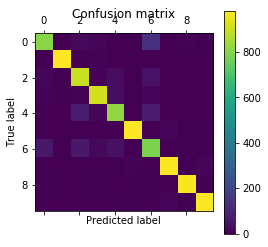

In [13]:
print(cm)

plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [14]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 128)         0         
___________________________

In [15]:
model.fit(scaled_train_data, train_labels,validation_split = 0.1, epochs=30, batch_size=256, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
 - 175s - loss: 0.6307 - acc: 0.7689 - val_loss: 0.4103 - val_acc: 0.8493
Epoch 2/30
 - 152s - loss: 0.3772 - acc: 0.8646 - val_loss: 0.3339 - val_acc: 0.8773
Epoch 3/30
 - 157s - loss: 0.3250 - acc: 0.8832 - val_loss: 0.2925 - val_acc: 0.8938
Epoch 4/30
 - 143s - loss: 0.2943 - acc: 0.8938 - val_loss: 0.2773 - val_acc: 0.8960
Epoch 5/30
 - 163s - loss: 0.2728 - acc: 0.8998 - val_loss: 0.2583 - val_acc: 0.9043
Epoch 6/30
 - 146s - loss: 0.2533 - acc: 0.9074 - val_loss: 0.2648 - val_acc: 0.9042
Epoch 7/30
 - 150s - loss: 0.2374 - acc: 0.9133 - val_loss: 0.2435 - val_acc: 0.9085
Epoch 8/30
 - 141s - loss: 0.2245 - acc: 0.9161 - val_loss: 0.2380 - val_acc: 0.9118
Epoch 9/30
 - 139s - loss: 0.2149 - acc: 0.9204 - val_loss: 0.2344 - val_acc: 0.9120
Epoch 10/30
 - 140s - loss: 0.2019 - acc: 0.9239 - val_loss: 0.2205 - val_acc: 0.9177
Epoch 11/30
 - 142s - loss: 0.1921 - acc: 0.9290 - val_loss: 0.2351 - val_acc: 0.9120
Epoch 12/30
 -

In [17]:
vgg16_model = keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 1291s 2us/step


In [ ]:
vgg16_model.summary()

In [ ]:
type(vgg16_model)
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)
model.summary()    

In [ ]:
model.layers.pop()
model.summary()

In [ ]:
for layer in model.layers:
    layer.trainable = False
model.add(Dense(10, activation = 'softmax'))    
model.summary()
    

In [ ]:
model.compile(Adam(lr=.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit_generator(scaled_train_data, train_labels,validation_split = 0.1, epochs=5, batch_size=256, verbose=2)